### Question 4
The method SVM.fit uses the code you wrote above to train the SVM. After each epoch (one pass through the training set), SVM.fit computes the training loss, the training accuracy, the test loss, and the test accuracy.
    
Plot the value of these four quantities for every epoch for C = 0.1, 1, 30, 50. 

Use 200 epochs, a learning rate of 0.001, and a minibatch size of 5000.
    
You should have four plots: one for each quantity, with the curves for all four values of C. 
Include these four plots in your report.

Loading data...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ift_6390/homework2
Iteration 0:
Train accuracy: 0.409060
Train loss: 1.010094
Test accuracy: 0.410400
Test loss: 1.010093

Iteration 1:
Train accuracy: 0.409060
Train loss: 1.020088
Test accuracy: 0.410400
Test loss: 1.020085

Iteration 2:
Train accuracy: 0.409060
Train loss: 1.029982
Test accuracy: 0.410400
Test loss: 1.029978

Iteration 3:
Train accuracy: 0.409060
Train loss: 1.039777
Test accuracy: 0.410400
Test loss: 1.039772

Iteration 4:
Train accuracy: 0.409060
Train loss: 1.049476
Test accuracy: 0.410400
Test loss: 1.049469

Iteration 5:
Train accuracy: 0.409060
Train loss: 1.059077
Test accuracy: 0.410400
Test loss: 1.059069

Iteration 6:
Train accuracy: 0.409060
Train loss: 1.068583
Test accuracy: 0.410400
Test loss: 1.068573

Iteration 7:
Train accuracy: 0.409060
Train loss: 1.077995
Test accuracy: 0.410400
T

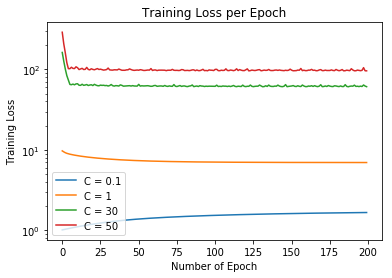

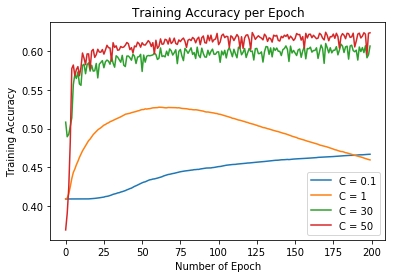

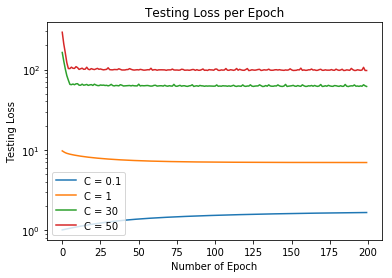

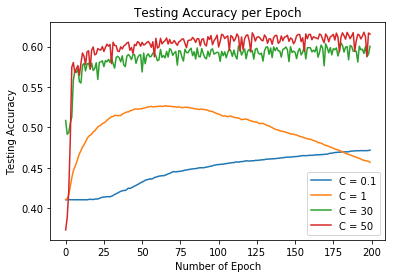

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


class SVM:
    def __init__(self,eta, C, niter, batch_size, verbose):
        self.eta = eta; self.C = C; self.niter = niter; self.batch_size = batch_size; self.verbose = verbose

#TODO check edges cases for m (can we assume that the max label number is smaller than m?)
    def make_one_versus_all_labels(self, y, m):
        """
	y : numpy array of shape (n,)
	m : int (in this homework, m will be 10)
	returns : numpy array of shape (n,m)
	"""
        ova = np.full((y.shape[0], m), -1)
        for i, row in enumerate(ova):
            row[y[i]] = 1
        return ova

    def compute_loss(self, x, y):
        """underunderunder
	x : numpy array of shape (minibatch size, 401)
	y : numpy array of shape (minibatch size, 10)
	returns : float
	"""
        scores = x.dot(self.w)
        margins = np.maximum(0, 1 - np.multiply(scores, y))
        loss = np.mean(np.sum(margins, axis=1))
        loss = self.C * loss
        # Computes de regularization term
        loss += 0.5 * np.sum(np.linalg.norm(self.w, ord=2, axis=0))
        return loss

    def compute_gradient(self, x, y):
        """
	x : numpy array of shape (minibatch size, 401)
	y : numpy array of shape (minibatch size, 10)
	returns : numpy array of shape (401, 10)
	"""
        scores = x.dot(self.w)
        active = (np.multiply(scores, y) < 1).astype(float)
        grad = np.dot(-x.T, np.multiply(y, active))
        grad = 2 * self.C * grad / y.shape[0]
        # Regularization term
        grad += self.w
        return grad

    # Batcher function
    def minibatch(self, iterable1, iterable2, size=1):
        l = len(iterable1)
        n = size
        for ndx in range(0, l, n):
            index2 = min(ndx + n, l)
            yield iterable1[ndx: index2], iterable2[ndx: index2]

    def infer(self, x):
        """
	x : numpy array of shape (number of examples to infer, 401)
	returns : numpy array of shape (number of examples to infer, 10)
	"""
        y = x.dot(self.w)
        y_ova = -1 * np.ones(y.shape)
        y_ova[np.arange(y_ova.shape[0]), np.argmax(y, axis=1)] = 1
        return y_ova

    def compute_accuracy(self, y_inferred, y):
        y_ova[:, class_index] = 1
        return y_ova

    def compute_accuracy(self, y_inferred, y):
        """
	y_inferred : numpy array of shape (number of examples, 10)
	y : numpy array of shape (number of examples, 10)
	returns : float
	"""
        return np.sum(np.all(y == y_inferred, axis=1).astype(float)) / y.shape[0]

    def fit(self, x_train, y_train, x_test, y_test):
        """
        x_train : numpy array of shape (number of training examples, 401)
        y_train : numpy array of shape (number of training examples, 10)
        x_test : numpy array of shape (number of training examples, 401)
        y_test : numpy array of shape (number of training examples, 10)
        returns : float, float, float, float
        """
        self.num_features = x_train.shape[1]
        self.m = y_train.max() + 1
        y_train = self.make_one_versus_all_labels(y_train, self.m)
        y_test = self.make_one_versus_all_labels(y_test, self.m)
        self.w = np.zeros([self.num_features, self.m])
        
        train_loss_epoch = list()
        train_acc_epoch = list()
        test_loss_epoch = list()
        test_acc_epoch = list()
        iterations = list()
        
        for iteration in range(self.niter):
            # Train one pass through the training set
            for x, y in self.minibatch(x_train, y_train, size=self.batch_size):
                grad = self.compute_gradient(x, y)
                self.w -= self.eta * grad

            # Measure loss and accuracy on training set
            train_loss = self.compute_loss(x_train, y_train)
            y_inferred = self.infer(x_train)
            train_accuracy = self.compute_accuracy(y_inferred, y_train)

            # Measure loss and accuracy on test set
            test_loss = self.compute_loss(x_test, y_test)
            y_inferred = self.infer(x_test)
            test_accuracy = self.compute_accuracy(y_inferred, y_test)

            if self.verbose:
                print("Iteration %d:" % iteration)
                print("Train accuracy: %f" % train_accuracy)
                print("Train loss: %f" % train_loss)
                print("Test accuracy: %f" % test_accuracy)
                print("Test loss: %f" % test_loss)
                print("")
            
            train_loss_epoch.append(train_loss)
            train_acc_epoch.append(train_accuracy)
            test_loss_epoch.append(test_loss)
            test_acc_epoch.append(test_accuracy)
            iterations.append(iteration)
            
        return train_loss_epoch, train_acc_epoch, test_loss_epoch, test_acc_epoch, iterations

if __name__ == "__main__":
    # Load the data files
    print("Loading data...")

    drive.mount('/content/drive')
    %cd /content/drive/My Drive/ift_6390/homework2/
    x_train = np.load("train_features.npy")
    x_test = np.load("test_features.npy")
    y_train = np.load("train_labels.npy")
    y_test = np.load("test_labels.npy")
             
    def plot(loss_or_acc,iterations, title, ylabel, is_loss):
      plt.plot(iterations,loss_or_acc[0],label="C = 0.1")
      plt.plot(iterations,loss_or_acc[1],label="C = 1")
      plt.plot(iterations,loss_or_acc[2],label="C = 30")
      plt.plot(iterations,loss_or_acc[3],label="C = 50")
      plt.legend()
      plt.title(title)
      plt.xlabel('Number of Epoch')
      plt.ylabel(ylabel)
      if is_loss:
        plt.yscale("log")
      plt.show()
        #plt.savefig(title+'.png', bbox_inches='tight')
      
    
    C = [0.1, 1, 30, 50]
    
    EPOCH = 200
    
    train_losses = list()
    train_acc = list()
    test_losses = list()
    test_acc = list()
    
    for c in C:
        svm = SVM(eta=0.001, C=c, niter=EPOCH, batch_size=5000, verbose=True)
        # to compute the gradient or loss before training, do the following:
        y_train_ova = svm.make_one_versus_all_labels(y_train, 10) # one-versus-all labels
        svm.w = np.zeros([401, 10])
        grad = svm.compute_gradient(x_train, y_train_ova)
        loss = svm.compute_loss(x_train, y_train_ova)

        train_loss_epoch, train_acc_epoch, test_loss_epoch, test_acc_epoch, iterations = svm.fit(x_train, y_train, x_test, y_test)
        
        train_losses.append(train_loss_epoch)
        train_acc.append(train_acc_epoch)
        test_losses.append(test_loss_epoch)
        test_acc.append(test_acc_epoch)
    
    title_train_loss = "Training Loss per Epoch"
    ylabel_train_loss = 'Training Loss'
    title_train_acc = "Training Accuracy per Epoch"
    ylabel_train_acc = 'Training Accuracy'
    title_test_loss = "Testing Loss per Epoch"
    ylabel_test_loss = 'Testing Loss'
    title_test_acc = "Testing Accuracy per Epoch"
    ylabel_test_acc = 'Testing Accuracy'

    plot(train_losses,iterations,title_train_loss,ylabel_train_loss, is_loss=True)
    plot(train_acc,iterations,title_train_acc,ylabel_train_acc, is_loss=False)
    plot(test_losses,iterations,title_test_loss,ylabel_test_loss, is_loss=True)
    plot(test_acc,iterations,title_test_acc,ylabel_test_acc, is_loss=False)
    

    # to infer after training, do the following:
    #y_inferred = svm.infer(x_test)


